# Notebook Description

This notebook is In-depth analysis of financial data of 3 companies: Microsoft, Apple, Tesla. This data is collected manually from the [SEC's EDGAR's database](https://www.sec.gov/edgar/searchedgar/cik) . For now it is collected for 10-K fillings for only 3 Fiscal years.

The dataset contains following features:

 1. **Total Revenue** is the total amount of money a company earns from selling its products or services.

2. **Net Income**  is the profit a company makes after subtracting all its expenses from its revenue.
3. **Total Assets**  are all the things a company owns, like buildings, equipment, and cash. 

4. **Total Liabilities** are all the debts a company owes, like loans or bills it needs to pay.

5. **Cash Flow from Operating Activities** is the money a company generates from its daily business operations, like selling products or services.

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Manually Extracted Dataset from SEC's EDGAR's database

In [3]:
df = pd.read_csv('data_extracted.csv')

In [4]:
df

,Year,Company,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,2021,Microsoft,168088,61271,333779,191791,76740
1,2022,Microsoft,198270,72738,364840,198298,89035
2,2023,Microsoft,211915,72361,411976,205753,87582
3,2021,Tesla,53821,5519,62131,30548,11497
4,2022,Tesla,81462,12556,82338,36440,14724
5,2023,Tesla,96773,14974,106618,43009,13256
6,2021,Apple,365817,94680,351002,287912,104038
7,2022,Apple,394328,99803,352755,302083,122151
8,2023,Apple,383285,96995,352583,290437,110543


In [5]:
df.shape

(9, 7)

In [6]:
df.dtypes

Year                                    int64
Company                                object
Total Revenue                           int64
Net Income                              int64
Total Assets                            int64
Total Liabilities                       int64
Cash Flow from Operating Activities     int64
dtype: object

In [7]:
df['Year'] = pd.to_datetime(df.Year, format='%Y').dt.year

In [8]:
df.dtypes

Year                                    int32
Company                                object
Total Revenue                           int64
Net Income                              int64
Total Assets                            int64
Total Liabilities                       int64
Cash Flow from Operating Activities     int64
dtype: object

# Calculating Year-by-Year growth rates 

Let's try to see how these financial metrics changed over the course of year. This can done using year-by-year growth method, which is nothing but percentage change between current and prior value


**Formula :** 

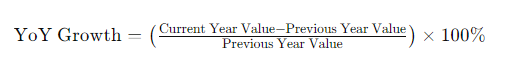

In [9]:
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100
df['Total Assets Growth (%)'] = df.groupby(['Company'])['Total Assets'].pct_change() * 100
df['Total Liabilities Growth (%)'] = df.groupby(['Company'])['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby(['Company'])['Cash Flow from Operating Activities'].pct_change() * 100

### Imputing Null/NaN values that result from pct_change calculations with 0

In [10]:
df.fillna(0, inplace=True)

In [11]:
df

,Year,Company,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Total Assets Growth (%),Total Liabilities Growth (%),Cash Flow Growth (%)
0,2021,Microsoft,168088,61271,333779,191791,76740,0.000000,0.000000,0.000000,0.000000,0.000000
1,2022,Microsoft,198270,72738,364840,198298,89035,17.956071,18.715216,9.305858,3.392756,16.021631
2,2023,Microsoft,211915,72361,411976,205753,87582,6.882030,-0.518299,12.919636,3.759493,-1.631942
3,2021,Tesla,53821,5519,62131,30548,11497,0.000000,0.000000,0.000000,0.000000,0.000000
4,2022,Tesla,81462,12556,82338,36440,14724,51.357277,127.504983,32.523217,19.287678,28.068192
5,2023,Tesla,96773,14974,106618,43009,13256,18.795267,19.257725,29.488207,18.026894,-9.970117
6,2021,Apple,365817,94680,351002,287912,104038,0.000000,0.000000,0.000000,0.000000,0.000000
7,2022,Apple,394328,99803,352755,302083,122151,7.793788,5.410858,0.499427,4.921990,17.409985
8,2023,Apple,383285,96995,352583,290437,110543,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992


In [12]:
df[df['Year']==2023]

,Year,Company,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Total Assets Growth (%),Total Liabilities Growth (%),Cash Flow Growth (%)
2,2023,Microsoft,211915,72361,411976,205753,87582,6.882030,-0.518299,12.919636,3.759493,-1.631942
5,2023,Tesla,96773,14974,106618,43009,13256,18.795267,19.257725,29.488207,18.026894,-9.970117
8,2023,Apple,383285,96995,352583,290437,110543,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992


**The key takeaways are:**
1. Year 2021 to 2022:
   - Tesla saw the highest Revenue growth, Net Income Growth, Increase in Total Assets, etc., in every financial metrics in the dataset in comparision with Microsoft and Tesla
   - Apple's liabilities grew 5% but assets only 0.5% thus shows no proper assets and liability management.

2. Year 2022 to 2023:
   - Tesla still showed highest growth in 2022 to 2023, though their cash flow from operating activities showed negative growth.
   - Even though Apple showed negative growth in all metrices, the liabilities decreased with 3.8% whereas total assets decreased only by 0.04%, which shows improved asset-liability management
   - Microsoft also didn't showed much growth, but their assets grew with 12% and liabilities only by 3.7%.


In [13]:
summary = df.groupby('Company').agg({
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean',
    'Total Assets Growth (%)' : 'mean',
    'Total Liabilities Growth (%)' : 'mean',
    'Cash Flow Growth (%)' :'mean'    
}).reset_index()

In [14]:
print('Year-By-Year Average Growth Rates(%) :-')
print('             OR')
print("Overall Growth/Fall rate for Apple, Microsoft and Tesla from Fiscal Year 2021 - 2023")
summary

Year-By-Year Average Growth Rates(%) :-
             OR
Overall Growth/Fall rate for Apple, Microsoft and Tesla from Fiscal Year 2021 - 2023


,Company,Revenue Growth (%),Net Income Growth (%),Total Assets Growth (%),Total Liabilities Growth (%),Cash Flow Growth (%)
0,Apple,1.664442,0.865772,0.150223,0.355586,2.635664
1,Microsoft,8.279367,6.065639,7.408498,2.384083,4.796563
2,Tesla,23.384181,48.920903,20.670475,12.438191,6.032692


# Net Profit Margin
The net profit margin, also known as the net margin or net profit percentage, is a financial metric that measures the percentage of revenue that a company retains as net income, after accounting for all expenses, taxes, and interest. It's calculated by dividing net income by revenue and multiplying by 100.

In [15]:
df.head()

,Year,Company,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Total Assets Growth (%),Total Liabilities Growth (%),Cash Flow Growth (%)
0,2021,Microsoft,168088,61271,333779,191791,76740,0.000000,0.000000,0.000000,0.000000,0.000000
1,2022,Microsoft,198270,72738,364840,198298,89035,17.956071,18.715216,9.305858,3.392756,16.021631
2,2023,Microsoft,211915,72361,411976,205753,87582,6.882030,-0.518299,12.919636,3.759493,-1.631942
3,2021,Tesla,53821,5519,62131,30548,11497,0.000000,0.000000,0.000000,0.000000,0.000000
4,2022,Tesla,81462,12556,82338,36440,14724,51.357277,127.504983,32.523217,19.287678,28.068192


In [16]:
df['Net Profit Margin'] = (df['Net Income'] / df['Total Revenue'] ) * 100

In [17]:
df

,Year,Company,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Total Assets Growth (%),Total Liabilities Growth (%),Cash Flow Growth (%),Net Profit Margin
0,2021,Microsoft,168088,61271,333779,191791,76740,0.000000,0.000000,0.000000,0.000000,0.000000,36.451740
1,2022,Microsoft,198270,72738,364840,198298,89035,17.956071,18.715216,9.305858,3.392756,16.021631,36.686337
2,2023,Microsoft,211915,72361,411976,205753,87582,6.882030,-0.518299,12.919636,3.759493,-1.631942,34.146238
3,2021,Tesla,53821,5519,62131,30548,11497,0.000000,0.000000,0.000000,0.000000,0.000000,10.254362
4,2022,Tesla,81462,12556,82338,36440,14724,51.357277,127.504983,32.523217,19.287678,28.068192,15.413322
5,2023,Tesla,96773,14974,106618,43009,13256,18.795267,19.257725,29.488207,18.026894,-9.970117,15.473324
6,2021,Apple,365817,94680,351002,287912,104038,0.000000,0.000000,0.000000,0.000000,0.000000,25.881793
7,2022,Apple,394328,99803,352755,302083,122151,7.793788,5.410858,0.499427,4.921990,17.409985,25.309641
8,2023,Apple,383285,96995,352583,290437,110543,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992,25.306234


In [18]:
pd.DataFrame(df.groupby('Company')['Net Profit Margin'].mean())

,Net Profit Margin
Company,
Apple,25.499223
Microsoft,35.761438
Tesla,13.713669


**Key Takeaways**
 - Even though Tesla showed better Year-by-Year growth as compared to Microsoft and Apple. The Net profit margin is lowest for Tesla.
 - Microsoft has the highest net profit margin, indicating it's the most profitable among the three companies.

# Asset Turnover Ratio
The asset turnover ratio, also known as the asset utilization ratio, is a financial metric that measures a company's ability to generate revenue from its assets. It's calculated by dividing revenue by total assets.

In [19]:
df['Asset Turnover Ratio'] = df['Total Revenue']/df['Total Assets']

In [20]:
df

,Year,Company,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Total Assets Growth (%),Total Liabilities Growth (%),Cash Flow Growth (%),Net Profit Margin,Asset Turnover Ratio
0,2021,Microsoft,168088,61271,333779,191791,76740,0.000000,0.000000,0.000000,0.000000,0.000000,36.451740,0.503591
1,2022,Microsoft,198270,72738,364840,198298,89035,17.956071,18.715216,9.305858,3.392756,16.021631,36.686337,0.543444
2,2023,Microsoft,211915,72361,411976,205753,87582,6.882030,-0.518299,12.919636,3.759493,-1.631942,34.146238,0.514387
3,2021,Tesla,53821,5519,62131,30548,11497,0.000000,0.000000,0.000000,0.000000,0.000000,10.254362,0.866250
4,2022,Tesla,81462,12556,82338,36440,14724,51.357277,127.504983,32.523217,19.287678,28.068192,15.413322,0.989361
5,2023,Tesla,96773,14974,106618,43009,13256,18.795267,19.257725,29.488207,18.026894,-9.970117,15.473324,0.907661
6,2021,Apple,365817,94680,351002,287912,104038,0.000000,0.000000,0.000000,0.000000,0.000000,25.881793,1.042208
7,2022,Apple,394328,99803,352755,302083,122151,7.793788,5.410858,0.499427,4.921990,17.409985,25.309641,1.117852
8,2023,Apple,383285,96995,352583,290437,110543,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992,25.306234,1.087077


In [21]:
pd.DataFrame(df.groupby('Company')['Asset Turnover Ratio'].mean())

,Asset Turnover Ratio
Company,
Apple,1.082379
Microsoft,0.520474
Tesla,0.921091


**From this analysis, we can see that:**
 - Apple has the highest asset turnover ratio, indicating it's the most efficient in using its assets to generate revenue.
 - Even though its Year-by-Year growth is less, that may be because that data is limited.
 - This can also be further strengthened by Apple's net profit margin which is comparitively better.

# D/E Ratio

The debt-to-equity ratio, also known as the D/E ratio, is a financial metric that measures a company's leverage by comparing its total liabilities (debt) to its total shareholders' equity. It's calculated by dividing total liabilities by total shareholders' equity.

Here Total shareholders euity is calculated as  Total Assets - Total Liabilities

In [22]:
df['D/E Ratio'] = df['Total Liabilities'] / (df['Total Assets'] - df['Total Liabilities'])

In [23]:
df

,Year,Company,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Total Assets Growth (%),Total Liabilities Growth (%),Cash Flow Growth (%),Net Profit Margin,Asset Turnover Ratio,D/E Ratio
0,2021,Microsoft,168088,61271,333779,191791,76740,0.000000,0.000000,0.000000,0.000000,0.000000,36.451740,0.503591,1.350755
1,2022,Microsoft,198270,72738,364840,198298,89035,17.956071,18.715216,9.305858,3.392756,16.021631,36.686337,0.543444,1.190679
2,2023,Microsoft,211915,72361,411976,205753,87582,6.882030,-0.518299,12.919636,3.759493,-1.631942,34.146238,0.514387,0.997721
3,2021,Tesla,53821,5519,62131,30548,11497,0.000000,0.000000,0.000000,0.000000,0.000000,10.254362,0.866250,0.967229
4,2022,Tesla,81462,12556,82338,36440,14724,51.357277,127.504983,32.523217,19.287678,28.068192,15.413322,0.989361,0.793934
5,2023,Tesla,96773,14974,106618,43009,13256,18.795267,19.257725,29.488207,18.026894,-9.970117,15.473324,0.907661,0.676146
6,2021,Apple,365817,94680,351002,287912,104038,0.000000,0.000000,0.000000,0.000000,0.000000,25.881793,1.042208,4.563512
7,2022,Apple,394328,99803,352755,302083,122151,7.793788,5.410858,0.499427,4.921990,17.409985,25.309641,1.117852,5.961537
8,2023,Apple,383285,96995,352583,290437,110543,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992,25.306234,1.087077,4.673462


In [24]:
pd.DataFrame(df.groupby('Company')['D/E Ratio'].mean())

,D/E Ratio
Company,
Apple,5.066171
Microsoft,1.179718
Tesla,0.812437


**Interpretation of debt-to-equity ratio values**

- **Low debt-to-equity ratio (less than 1):** Indicates a company is financed primarily through equity and has a lower risk of default.
- **Moderate debt-to-equity ratio (1-2):** Suggests a company has a balanced capital structure, with a mix of debt and equity financing.
- **High debt-to-equity ratio (greater than 2):** Indicates a company is highly leveraged and may be at a higher risk of default.

**Key Takeaways:**
- Microsoft has a balanced capital structure, with a debt-to-equity ratio close to 1.
This suggests that the company is financing its operations through a mix of debt and equity.
Microsoft's financial health appears to be stable, with a manageable level of debt.
- Apple has a high debt-to-equity ratio, indicating that the company is highly leveraged.
This suggests that Apple is financing its operations primarily through debt, which can increase the risk of default.
Apple's financial health appears to be more vulnerable, with a high level of debt and a lower level of equity.
- Tesla has a relatively low debt-to-equity ratio, indicating that the company is financed primarily through equity.
This suggests that Tesla has a conservative capital structure, with a lower reliance on debt financing.
Tesla's financial health appears to be strong, with a low level of debt and a high level of equity.

# Trend Analysis

In [25]:
df.head()

,Year,Company,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Total Assets Growth (%),Total Liabilities Growth (%),Cash Flow Growth (%),Net Profit Margin,Asset Turnover Ratio,D/E Ratio
0,2021,Microsoft,168088,61271,333779,191791,76740,0.000000,0.000000,0.000000,0.000000,0.000000,36.451740,0.503591,1.350755
1,2022,Microsoft,198270,72738,364840,198298,89035,17.956071,18.715216,9.305858,3.392756,16.021631,36.686337,0.543444,1.190679
2,2023,Microsoft,211915,72361,411976,205753,87582,6.882030,-0.518299,12.919636,3.759493,-1.631942,34.146238,0.514387,0.997721
3,2021,Tesla,53821,5519,62131,30548,11497,0.000000,0.000000,0.000000,0.000000,0.000000,10.254362,0.866250,0.967229
4,2022,Tesla,81462,12556,82338,36440,14724,51.357277,127.504983,32.523217,19.287678,28.068192,15.413322,0.989361,0.793934


### Net Income Trend

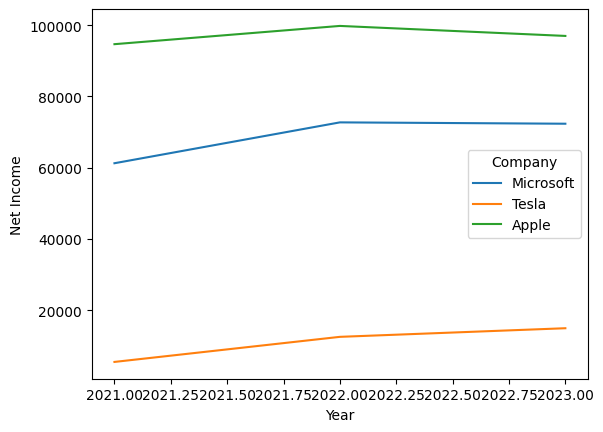

In [26]:
sns.lineplot(x = df['Year'], y = df['Net Income'], hue=df['Company'])
plt.show()

**Key Takeaways:**
- Tesla's rapid growth in net income suggests that the company is becoming more profitable.
- Microsoft's stable net income indicates that the company is maintaining its profitability.
- Apple's slight decrease in net income might be a cause for concern, but it's still a highly profitable company.

### Revenue Trend

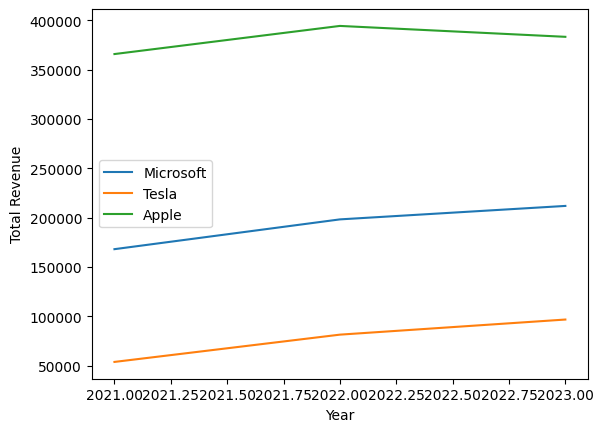

In [27]:
sns.lineplot(x = df['Year'], y = df['Total Revenue'], hue=df['Company'])
plt.legend(loc='best')
plt.show()

**Key Takeaways:**
- Both Microsoft and Tesla are experiencing significant revenue growth, indicating that their businesses are expanding.
- Apple's revenue stability might be a sign of market saturation or increased competition.

### Cash Flow Trend

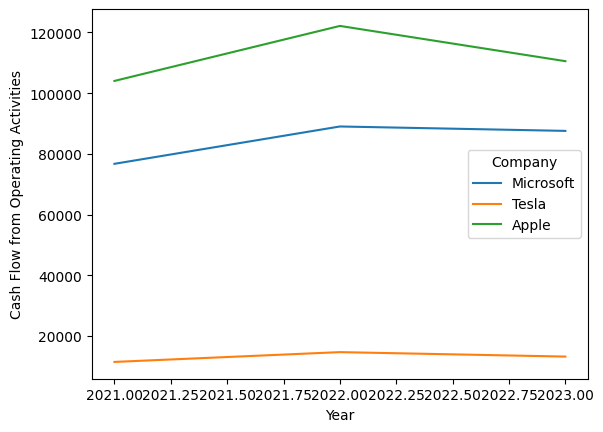

In [28]:
sns.lineplot(x = df['Year'], y = df['Cash Flow from Operating Activities'], hue=df['Company'])
plt.show()

**Key Takeaways:**
- Both Microsoft and Tesla are generating more cash from their operations, indicating that their businesses are becoming more efficient.
- Apple's cash flow stability might be a sign of a mature business with stable operations.

### Correlation Analysis

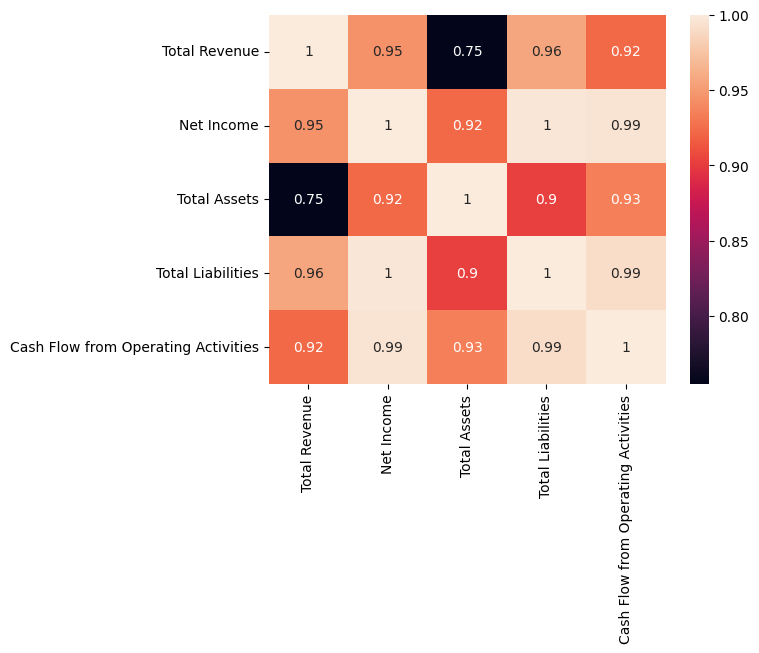

In [29]:
# Select the columns for correlation analysis
columns = ["Total Revenue", "Net Income", "Total Assets", "Total Liabilities", "Cash Flow from Operating Activities"]

# Calculate the correlation matrix
corr_matrix = df[columns].corr()

# plot the corr_matix
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Key Takeaways**
- Revenue is a strong driver of Net Income
- Asset growth is accompanied by Liability growth
- Revenue growth drives Cash Flow growth

# Conclusion

This is current analysis on this financial dataset which is limited on 3 fiscal years. Many new insights can be gained, and it is also possible that many insights will change as the dataset increases. More In-depth analysis can be done if we delve in year by year rather than focusing on average, but for now this much should do the work.

We can also check for different indexes such as Current Ratio, Net Present Value, Internal Rate of Return, DSO Return on Assets, Return on Equity, etc. We will get back on it if need arises.

In [31]:
df.to_csv('final_data.csv')